# KENYAN HOUSE PREDICTION


---


## Project Description:

This project aims to develop a robust predictive model to assist clients in making informed decisions when buying or renting a house. The model will leverage historical data to provide accurate property value estimates and actionable insights. Unlike existing models that heavily rely on real-time updates, this solution focuses on extensive historical data, offering consistent and reliable predictions without the need for continuous data refreshes.

The predictive model will incorporate machine learning algorithms such as Support Vector Machine (SVM), Decision Tree, and Random Forest to capture complex relationships between property features and market values. Clients will also be able to explore different what-if scenarios, allowing them to see how various factors, such as market changes or property modifications, might impact prices.

The model will emphasize localized features, such as neighborhood characteristics and amenities, offering personalized and precise property valuations, thus enabling users to confidently navigate the real estate market.


---


## Conclusion:
By utilizing a combination of machine learning algorithms—Support Vector Machine (SVM), Decision Tree and Random Forest this predictive model provides a powerful tool for estimating property values based on historical data. Its focus on personalized insights, scenario-based analysis, and localized data sets it apart from other existing models, making it more adaptable to the diverse real estate market in Kenya.

With accurate predictions and enhanced user experience, this model will empower clients to make informed, data-driven decisions in their real estate transactions, ultimately improving their confidence and success in the property market.

## Basic Data Exploartion

In [2]:
# libraries to handle data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Path to the Rent Dataset.
rent_file_path = r'dataset\rent_apts_with_subcounties.csv'

# Convert the dataset to a DataFrame
rent_df = pd.read_csv(rent_file_path)


In [1]:
# load the dataset from drive
#from google.colab import drive
#drive.mount('/content/drive')


#rent_file_path = '/content/drive/MyDrive/Final_Year_Project/Dataset/rent_apts_with_subcounties.csv'

# Create a DataFrame
#rent_df = pd.read_csv(rent_file_path)

In [5]:
from IPython.display import display, HTML

# Create a scrollable table to visualize the whole dataset
def create_scrollable_table (rent_df, table_id, title):
  """
    Creates an HTML string for a scrollable table to display DataFrame content.

    Parameters:
    rent_df (pd.DataFrame): The DataFrame to be converted into an HTML table.
    table_id (str): The HTML id attribute for the div containing the table.
    title (str): The title to be displayed above the table.

    Returns:
    str: An HTML string containing the scrollable table.
    """
  html = f'<h3>{title}</h3>'
  html += f'<div id ="{table_id}" style = "height:200px; overflow:auto">'
  html += rent_df.to_html()
  html += '</div>'
  return html

In [6]:
# Display the shape of the dataset
print(rent_df.shape)
print()
rent_df.head()

(1848, 8)



,Agency,Sub_County,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,Westlands,General Mathenge,"KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,Dagoretti North,Kilimani,"KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,Dagoretti North,"Hatheru Rd,Lavington","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,Dagoretti North,Kilimani,"KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,Embakasi,Imara Daima,"KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


### Understand the dataset

In [7]:
# Undersatand the dataset
print(f"There are {rent_df.shape[0]} rows in the dataset.")
print(f"There are {rent_df.shape[1]} columns in the dataset.")

There are 1848 rows in the dataset.
There are 8 columns in the dataset.


In [8]:
# Print the information of the dataset.
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Sub_County    1848 non-null   object 
 2   Neighborhood  1848 non-null   object 
 3   Price         1848 non-null   object 
 4   link          1848 non-null   object 
 5   sq_mtrs       1846 non-null   float64
 6   Bedrooms      1845 non-null   float64
 7   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(5)
memory usage: 115.6+ KB


### Descriptive Statistics for both Numerical and Categorical features

In [9]:
# Select numerical features and create descriptive statistics
numerical_features = rent_df.select_dtypes(include=[np.number])

# Create a descriptive statistics
num_stats = numerical_features.describe()

# Display the results.
html_num_stats = create_scrollable_table(num_stats, "Numerical_features", "Descriptive statistics for numerical features.")

display(HTML(html_num_stats))

,sq_mtrs,Bedrooms,Bathrooms
count,1846.000000,1845.000000,1557.000000
mean,327.226977,2.577778,2.595376
std,2048.784581,0.819399,1.000349
min,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,3.000000,3.000000
max,40470.000000,6.000000,6.000000


In [10]:
# Select categorical features and create descriptive statistics
categorical_features = rent_df.select_dtypes(include=[object])

# Create a descriptive statistics
cat_stats = categorical_features.describe()

# Display the results.
html_display = create_scrollable_table(cat_stats, "categorical_features", "Descriptive statistics for categorical features.")

display(HTML(html_display))

,Agency,Sub_County,Neighborhood,Price,link
count,1848,1848,1848,1848,1848
unique,194,37,647,112,1761
top,Prudential Green Ville,Dagoretti North,Kilimani,"KSh 100,000",/listings/4-bedroom-apartment-for-rent-general-mathenge-3468257
freq,98,850,168,137,2


### Summary descriptive statistics for both numerical and categorical features.


In [11]:
# Select numerical features
numerical_features = rent_df.select_dtypes(include=[np.number])

# Create summary statistics for the numerical features
sum_numerical_stats = numerical_features.describe().T

# Display the results
html_sum_numerical_stats = create_scrollable_table(sum_numerical_stats, "Summary_statistics", "Summary statistics for Numerical features.")

display(HTML(html_sum_numerical_stats))

,count,mean,std,min,25%,50%,75%,max
sq_mtrs,1846.0,327.226977,2048.784581,0.0,2.0,3.0,4.0,40470.0
Bedrooms,1845.0,2.577778,0.819399,0.0,2.0,3.0,3.0,6.0
Bathrooms,1557.0,2.595376,1.000349,1.0,2.0,2.0,3.0,6.0


In [12]:
# Select categorical features
categorical_features  = rent_df.select_dtypes(include = [object])

# create a summary statistics
sum_categorical_stats = categorical_features.describe().T

# Display the results.
html_sum_categorical_stats = create_scrollable_table(sum_categorical_stats, "Summary_statistics", "Summary statistics for Categorical features.")

display(HTML(html_sum_categorical_stats))

,count,unique,top,freq
Agency,1848,194,Prudential Green Ville,98
Sub_County,1848,37,Dagoretti North,850
Neighborhood,1848,647,Kilimani,168
Price,1848,112,"KSh 100,000",137
link,1848,1761,/listings/4-bedroom-apartment-for-rent-general-mathenge-3468257,2


## Data cleaning and Wrangling


---
- Drop the Agency and Links column from the dataset.
- Replace the Ksh in Price column with white space
- Convert the Price column to an integer.
- Check and count the Missing values in the dataset.
- Check for duplicates.
- Standardize the sqrt_mts.
- Move the independent variable to be in the last column.
- Find the summary descriptive statistics for both the numerical and categorical features.
- Print all the columns in the dataset.


---





### 1. Drop the Agency and Links column from the dataset.

In [13]:
# Check if the 'Agency' and 'link' columns exist in the dataset before attempting to drop them
columns_to_drop = ['Agency', 'link']
existing_columns = [col for col in columns_to_drop if col in rent_df.columns]

# Drop only the existing columns
if existing_columns:
    rent_df.drop(columns=existing_columns, errors='ignore', inplace=True)

# Print the remaining columns
print(rent_df.columns)
print("\nTHE NEWLY UPDATED DATASET.")
rent_df.head()

Index(['Sub_County', 'Neighborhood', 'Price', 'sq_mtrs', 'Bedrooms',
       'Bathrooms'],
      dtype='object')

THE NEWLY UPDATED DATASET.


,Sub_County,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,Westlands,General Mathenge,"KSh 155,000",4.0,4.0,4.0
1,Dagoretti North,Kilimani,"KSh 100,000",300.0,3.0,4.0
2,Dagoretti North,"Hatheru Rd,Lavington","KSh 75,000",3.0,3.0,5.0
3,Dagoretti North,Kilimani,"KSh 135,000",227.0,3.0,4.0
4,Embakasi,Imara Daima,"KSh 50,000",3.0,3.0,NaN


### 2. Replace the Ksh in Price column with white space

In [14]:
# Ensure all values in the Price column are strings
rent_df["Price"] = rent_df["Price"].astype(str)

# Replace "KSh" in the Price column
rent_df["Price"] = rent_df["Price"].str.replace("KSh", "", regex=False)

# Remove white spaces from the Price column
rent_df["Price"] = rent_df["Price"].str.replace(" ", "", regex=False)

# Remove commas from the Price column
rent_df["Price"] = rent_df["Price"].str.replace(",", "", regex=False)

# Convert the cleaned Price column back to numeric if needed
rent_df["Price"] = pd.to_numeric(rent_df["Price"], errors="coerce")

print(rent_df["Price"])


0       155000
1       100000
2        75000
3       135000
4        50000
         ...  
1843    180000
1844    180000
1845    180000
1846    180000
1847    180000
Name: Price, Length: 1848, dtype: int64


### 3. Convert the Price column to an integer.

In [15]:
# Convert the Price column to an integer.
rent_df['Price'] = rent_df['Price'].astype('int64')

# Check for the data type
rent_df['Price'].dtype

dtype('int64')

### 4. Check and count the Missing values in the dataset.

In [16]:
# Create a function to check and count for missing values.
def count_missing_values(rent_df):
  """
  Calculates and displays the number and percentage of missing values in a DataFrame.

  This function identifies the number of null (missing) values and their corresponding
  percentage for each column in the given DataFrame. It creates two scrollable HTML tables:
  one showing the count of missing values per column and another showing the percentage
  of missing values per column.

  Parameter:
  rent_df: The Dataframe to be analyzed for missing values.

  Returns:
  None.
  """

  # Function to count the missing values.
  missing_values = rent_df.isna().sum()

  html_missing_values = create_scrollable_table(missing_values.to_frame(), 'missing_values', 'Count of Missing values in the Dataset')

  # Calculate the percentage of the missing values.
  percentage_missing_values = (rent_df.isna().sum() / len(rent_df) * 100)
  html_percentage_missing_values = create_scrollable_table(percentage_missing_values.to_frame(), 'percentage_missing_values', 'Count of the percentage of the missing values.')

  # Diplay the output
  display(HTML(html_missing_values + html_percentage_missing_values ))

# Call the function to display both the missing values and the percentage of the missing values.
count_missing_values(rent_df)

,0
Sub_County,0
Neighborhood,0
Price,0
sq_mtrs,2
Bedrooms,3
Bathrooms,291
,0
Sub_County,0.000000
Neighborhood,0.000000
Price,0.000000


### 5. Check for duplicates.

In [17]:
# Create a function to handle duplicates
# Calculate how many duplicated values there're.
def count_duplicates(rent_df):
    """
    This function calculates and prints the number of duplicate rows in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The number of duplicate rows in the DataFrame.
    """
    duplicate_count = rent_df.duplicated().sum()
    print(f"There are {duplicate_count} duplicates in the data.")

    
    return duplicate_count

# Call the function
duplicate_count = count_duplicates(rent_df)

# Assessing the duplicates
print()
duplicates = rent_df[rent_df.duplicated()]
print(duplicates.head())


There are 226 duplicates in the data.

     Sub_County          Neighborhood  Price  sq_mtrs  Bedrooms  Bathrooms
58      Kiambaa    Limuru Road, Ruaka  20000   4000.0       1.0        1.0
65       Kikuyu  THOGOTO, Kikuyu Town  18000      1.0       1.0        1.0
80      Kiambaa                 Ruaka  25000      1.0       1.0        NaN
93   Athi River              Syokimau  28000      2.0       2.0        2.0
136    Embakasi           Imara Daima  35000      2.0       2.0        2.0


### 6. Remove Duplicates in the Dataset.

In [18]:
# Remove the duplicates and update the DataFrame
rent_df = rent_df.drop_duplicates()

# Calculate the number of duplicates removed
duplicates_removed = rent_df.shape[0] - rent_df.shape[0]

# Display the result
print("The number of duplicates after cleaning: ", duplicates_removed)

# Optionally, show the cleaned DataFrame
print(rent_df.head())


The number of duplicates after cleaning:  0
        Sub_County          Neighborhood   Price  sq_mtrs  Bedrooms  Bathrooms
0        Westlands      General Mathenge  155000      4.0       4.0        4.0
1  Dagoretti North              Kilimani  100000    300.0       3.0        4.0
2  Dagoretti North  Hatheru Rd,Lavington   75000      3.0       3.0        5.0
3  Dagoretti North              Kilimani  135000    227.0       3.0        4.0
4         Embakasi           Imara Daima   50000      3.0       3.0        NaN


### 7. Move the independent variable to be in the last column.

In [19]:
def move_column_to_end(rent_df, column_name):
    """
    Moves the specified column to the last position in the dataframe.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        column_name (str): The name of the column to move.

    Returns:
        pd.DataFrame: A dataframe with the specified column moved to the end.
    """

    # Remove the column and reinsert it at the end
    column = rent_df.pop(column_name)
    rent_df[column_name] = column
    return rent_df


# Move the independent variable `sq_mtrs` to the last column
rent_df = move_column_to_end(rent_df, 'Price')

rent_df.head()


,Sub_County,Neighborhood,sq_mtrs,Bedrooms,Bathrooms,Price
0,Westlands,General Mathenge,4.0,4.0,4.0,155000
1,Dagoretti North,Kilimani,300.0,3.0,4.0,100000
2,Dagoretti North,"Hatheru Rd,Lavington",3.0,3.0,5.0,75000
3,Dagoretti North,Kilimani,227.0,3.0,4.0,135000
4,Embakasi,Imara Daima,3.0,3.0,NaN,50000


### 8. Find the summary descriptive statistics for both the numerical and categorical features.

---



#### A. Numerical features.

In [20]:
# Select numerical features
numerical_features = rent_df.select_dtypes(include=[np.number])

# Create summary statistics for the numerical features
sum_numerical_stats = numerical_features.describe().T

# Display the results
html_sum_numerical_stats = create_scrollable_table(sum_numerical_stats, "Summary_statistics", "Summary statistics for Numerical features.")

display(HTML(html_sum_numerical_stats))

,count,mean,std,min,25%,50%,75%,max
sq_mtrs,1620.0,365.306173,2181.035762,0.0,2.00,3.0,14.25,40470.0
Bedrooms,1619.0,2.581223,0.829042,0.0,2.00,3.0,3.00,6.0
Bathrooms,1376.0,2.598837,1.015000,1.0,2.00,2.0,3.00,6.0
Price,1622.0,96963.312577,41034.694848,12000.0,69997.75,90000.0,130000.00,280000.0


#### B. Categorical features.

In [21]:
# Select categorical features
categorical_features  = rent_df.select_dtypes(include = [object])

# create a summary statistics
sum_categorical_stats = categorical_features.describe().T

# Display the results.
html_sum_categorical_stats = create_scrollable_table(sum_categorical_stats, "Summary_statistics", "Summary statistics for Categorical features.")

display(HTML(html_sum_categorical_stats))

,count,unique,top,freq
Sub_County,1622,37,Dagoretti North,717
Neighborhood,1622,647,Kilimani,128


### 9. Print all the columns in the dataset.


In [22]:
# Print all the columns in the dataset.
print(rent_df.columns)

Index(['Sub_County', 'Neighborhood', 'sq_mtrs', 'Bedrooms', 'Bathrooms',
       'Price'],
      dtype='object')


## Explore the dependent variables.

---


Qustion we want to ask the data?

1.   Does the Independent variable have a normal distribution?
2.   Is there any correlation between the dependent variables and the independent variables? Which has the highest correlation coefficient value?



### 1. Does the Independent variable have a normal distribution?

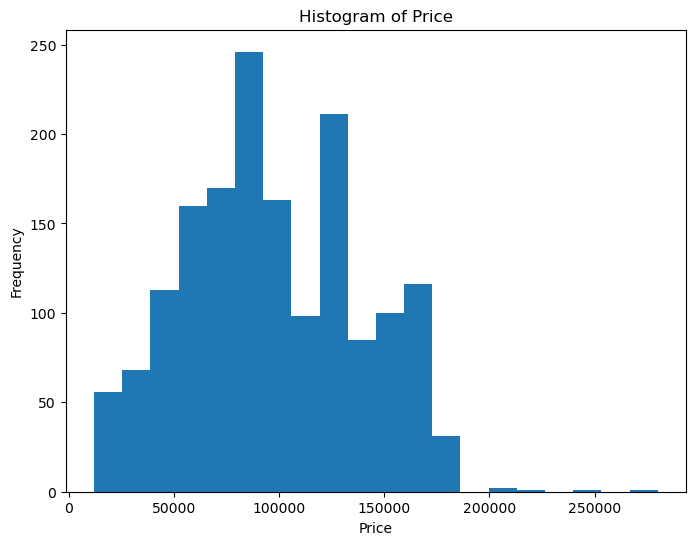

<Figure size 800x600 with 0 Axes>

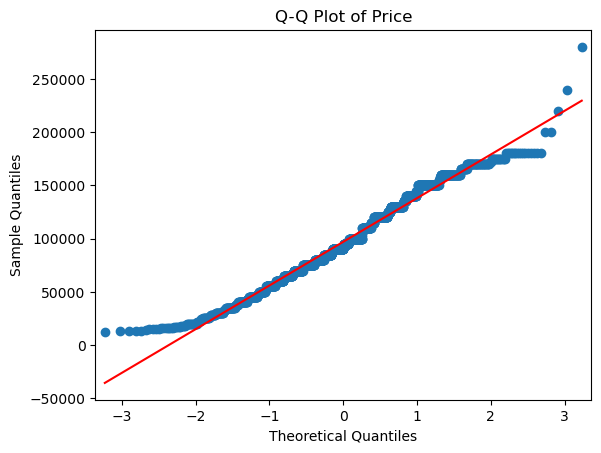

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(rent_df['Price'], bins=20)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(rent_df['Price'], line='s')
plt.title('Q-Q Plot of Price')
plt.show()

### 2.   Is there any correlation between the dependent variables and the independent variables? Which has the highest correlation coefficient value?

In [24]:
# Calculate the correlation matrix
# Select only numeric columns for correlation calculation
numeric_columns = rent_df.select_dtypes(include=["float64", "int64", "int32"])
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

,sq_mtrs,Bedrooms,Bathrooms,Price
sq_mtrs,1.000000,-0.005315,0.005837,-0.025844
Bedrooms,-0.005315,1.000000,0.732994,0.359262
Bathrooms,0.005837,0.732994,1.000000,0.444120
Price,-0.025844,0.359262,0.444120,1.000000


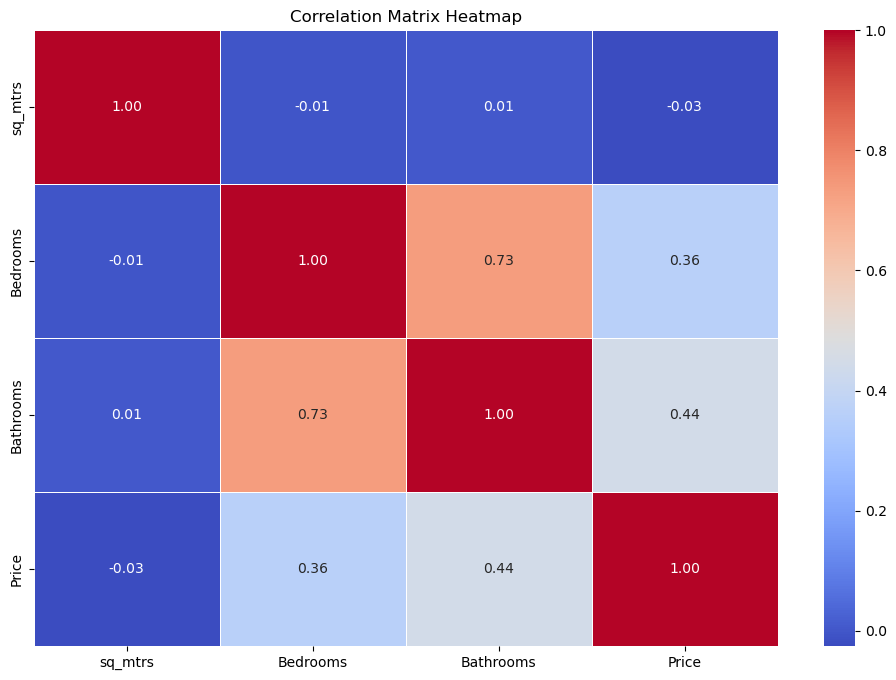

In [25]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [26]:
# Assuming 'target_column' is the name of your target variable
target_column = 'Price'

# Calculate the correlation matrix
correlation_matrix = correlation_matrix

# Get correlations of all features with the target variable
target_corr = correlation_matrix[target_column].drop(target_column)

# Find the feature with the strongest correlation to the target variable
max_value = target_corr.abs().max()
max_feature = target_corr.abs().idxmax()

print(f"The strongest correlation is between '{max_feature}' and '{target_column}' with a value of {max_value:.2f}")


The strongest correlation is between 'Bathrooms' and 'Price' with a value of 0.44


## Downloading the preprocessed Data


In [27]:
print(rent_df.head())

# Code to download the preprocessed data.
preprocessed_data = r'C:\Users\user\OneDrive\Documents\Real_estate_prediction_model\dataset\preprocessed_data.csv'

# Save the DataFrame to the specified CSV file
rent_df.to_csv(preprocessed_data, index=False)

print(preprocessed_data)

print(f"Data has been saved to {preprocessed_data}")

        Sub_County          Neighborhood  sq_mtrs  Bedrooms  Bathrooms   Price
0        Westlands      General Mathenge      4.0       4.0        4.0  155000
1  Dagoretti North              Kilimani    300.0       3.0        4.0  100000
2  Dagoretti North  Hatheru Rd,Lavington      3.0       3.0        5.0   75000
3  Dagoretti North              Kilimani    227.0       3.0        4.0  135000
4         Embakasi           Imara Daima      3.0       3.0        NaN   50000
C:\Users\user\OneDrive\Documents\Real_estate_prediction_model\dataset\preprocessed_data.csv
Data has been saved to C:\Users\user\OneDrive\Documents\Real_estate_prediction_model\dataset\preprocessed_data.csv


In [28]:
print(rent_df.head())

        Sub_County          Neighborhood  sq_mtrs  Bedrooms  Bathrooms   Price
0        Westlands      General Mathenge      4.0       4.0        4.0  155000
1  Dagoretti North              Kilimani    300.0       3.0        4.0  100000
2  Dagoretti North  Hatheru Rd,Lavington      3.0       3.0        5.0   75000
3  Dagoretti North              Kilimani    227.0       3.0        4.0  135000
4         Embakasi           Imara Daima      3.0       3.0        NaN   50000


## Create Data Pipeline.


---
Data pipeline automates the process of collecting, cleaning, transforming, and moving data from various sources to a data warehouse, data lake, or directly to a machine learning model.

Building a data pipeline is essential for ensuring the efficiency, quality, and reliability of data processing tasks. It facilitates better data management, scalability, and real-time processing, which are crucial for effective data analysis and machine learning. By automating and standardizing the workflow, data pipelines help organizations derive valuable insights from their data while maintaining compliance and reducing costs.

---




In [29]:
# Import the necessary libraries for creating the Transformers and Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Initalize the transformer for the numerical column to handle missing values
numerical_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

# Initialize the transformer and pipeline for the Categorical column to handle missing values
categorical_transformer = Pipeline(steps = [
   ( 'imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = True))
])

### Create a Transformer.

---
To ensure a more standardized and normally distributed target variable (y), I applied a natural log transformation to the prices during model training. This approach helps the model better capture relationships and reduces the influence of extreme values.


In [30]:
# Update the categorical and numerical columns.
categorical_columns = rent_df.select_dtypes(include = ['object', 'category']).columns

numerical_columns = rent_df.select_dtypes(include = ['int64', 'float64']).columns

# Drop the Target variable
numerical_columns = numerical_columns.drop('Price')


# Combine the Transformers using the ColumnTransformer.
preprocessor  = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ], remainder = 'passthrough')

# Create a Pipeline from the combined transformers
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor)
])

# Apply the pipeline to the Dataset
X = rent_df.drop('Price', axis = 1)
y = np.log(rent_df['Price']) # normalize the target variable

# Fit and transform the pipeline.
X_preprocessed = pipeline.fit_transform(X)

# print the shape of the processed data
print(X_preprocessed.shape)

(1622, 687)


In [31]:
# Check if there're duplicates in the dataset.

duplicated_count =  rent_df.duplicated().sum()
print(duplicated_count)

0


### Saving the Pipeline in a pickle file


In [32]:
import pickle

# Specify the directory and filename
file_path = r'C:\Users\user\OneDrive\Documents\Real_estate_prediction_model/pipeline.pkl'

# Save the pipeline to the specified directory
with open(file_path, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Pipeline saved to {file_path}")


Pipeline saved to C:\Users\user\OneDrive\Documents\Real_estate_prediction_model/pipeline.pkl


### Columns to be included in the Pipeline and the preprocessing step for the prediction.

In [33]:
print("Expected input columns:", preprocessor.feature_names_in_)


Expected input columns: ['Sub_County' 'Neighborhood' 'sq_mtrs' 'Bedrooms' 'Bathrooms']


### Check for missing values.

In [34]:
print(X_preprocessed.dtype)
print()
import numpy as np
from scipy.sparse import csr_matrix

# Assuming X_preprocessed is a csr_matrix

# Convert the sparse matrix to a dense NumPy array
X_dense = X_preprocessed.toarray()

# Now you can check for missing values (NaN) in the dense array
missing_values = np.isnan(X_dense).sum()
print(f"There are {missing_values} missing values.")

float64

There are 0 missing values.


## Model Creation and Parameter Tuning.

In [35]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR  # Support Vector Machine for regression
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Define the hyperparameter grids
param_grid = {
    'Support Vector Machine': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2'],
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
    }
}

# Set up K-Fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize an empty dictionary to store results
grid = {}
model_rmse_results = {}

# Train and tune the models
for model_name, model in models.items():
    print(f"\nTraining and Tuning Process for {model_name}\n")
    grid[model_name] = GridSearchCV(
        estimator=model,
        param_grid=param_grid[model_name],
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=2
    )

    # Fit the GridSearchCV to the training data
    grid[model_name].fit(X_train, y_train)

    # Extract the best parameters and best score
    best_params = grid[model_name].best_params_
    best_score = np.sqrt(-1 * grid[model_name].best_score_)

    # Store the RMSE in the results dictionary
    model_rmse_results[model_name] = best_score

    # Print the results
    print(f'The best parameter for {model_name}: {best_params}')
    print(f'The best RMSE for {model_name}: {best_score}\n')

# Identify the model with the lowest RMSE
best_model_name = min(model_rmse_results, key=model_rmse_results.get)
best_model_rmse = model_rmse_results[best_model_name]

# Display the best model
print("\n--- Model Comparison Results ---")
for model_name, rmse in model_rmse_results.items():
    print(f"{model_name}: RMSE = {rmse:.4f}")
print("\n--- Best Model for Deployment ---")
print(f"Best Model: {best_model_name} with RMSE = {best_model_rmse:.4f}")



Training and Tuning Process for Support Vector Machine

Fitting 3 folds for each of 12 candidates, totalling 36 fits
The best parameter for Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
The best RMSE for Support Vector Machine: 0.3377433898925963


Training and Tuning Process for Random Forest

Fitting 3 folds for each of 27 candidates, totalling 81 fits
The best parameter for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
The best RMSE for Random Forest: 0.34456249626866736


Training and Tuning Process for Decision Tree

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
The best parameter for Decision Tree: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
The best RMSE for Decision Tree: 0.36957315885361397


--- Model Comparison Results ---
Support Vector Machine: RMSE = 0.3377
Random Forest: RMSE = 0.3446
Decision Tree: RMSE = 0.3696

--- Best M

Support Vector Machine (SVM) is the best model for deployment. It has RMSE of 0.3307 lower that the other models.

## Model Prediction using the best Model.

---


### A. Model Prediction from the Training data.

---

To ensure a more standardized and normally distributed target variable, I applied a natural log transformation to the prices during model training. This approach helps the model better capture relationships and reduces the influence of extreme values.

After generating predictions in the log-transformed space, I reversed the transformation using the exponential function (np.exp) to convert the predicted values back to their original scale. This allows for direct comparison between the actual prices and the predicted prices, ensuring interpretability and practical relevance of the results.


In [36]:
# Evaluating training performance for all the best models
for model_name, grid_search in grid.items():
    print(f"\nEvaluating Training Performance for {model_name}\n")

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on the training data (log-transformed predictions)
    y_train_pred_log = best_model.predict(X_train)

    # Calculate evaluation metrics in the log-transformed space
    train_rmse_log = np.sqrt(mean_squared_error(y_train, y_train_pred_log))
    train_mae_log = mean_absolute_error(y_train, y_train_pred_log)
    train_r2_log = r2_score(y_train, y_train_pred_log)

    # Print metrics in the log-transformed space
    print(f"Training Metrics in Log-Transformed Space for {model_name}:")
    print(f" The training RMSE (log-transformed): {train_rmse_log:.4f}")
    print(f" The training MAE (log-transformed): {train_mae_log:.4f}")
    print(f" The training R² (log-transformed): {train_r2_log:.4f}\n")

    # Reverse the log transformation for the predictions and actuals
    y_train_pred = np.exp(y_train_pred_log)  # Convert back to original scale
    y_train_original = np.exp(y_train)  # Convert actual values to original scale

    # Calculate evaluation metrics in the original scale
    train_rmse_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred))
    train_mae_original = mean_absolute_error(y_train_original, y_train_pred)
    train_r2_original = r2_score(y_train_original, y_train_pred)

    # Print metrics in the original scale
    print(f"Training Metrics in Original Scale for {model_name}:")
    print(f" The training RMSE (original scale): {train_rmse_original:.4f}")
    print(f" The training MAE (original scale): {train_mae_original:.4f}")
    print(f" The training R² (original scale): {train_r2_original:.4f}\n")

    # Print a sample of actual and predicted prices in the original scale
    print("Sample of Actual vs Predicted Prices (Original Scale):")
    for actual, predicted in zip(y_train_original[:5], y_train_pred[:5]):  # Adjust number of samples as needed
        print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")



Evaluating Training Performance for Support Vector Machine

Training Metrics in Log-Transformed Space for Support Vector Machine:
 The training RMSE (log-transformed): 0.2081
 The training MAE (log-transformed): 0.1549
 The training R² (log-transformed): 0.8351

Training Metrics in Original Scale for Support Vector Machine:
 The training RMSE (original scale): 20945.6716
 The training MAE (original scale): 14808.1841
 The training R² (original scale): 0.7376

Sample of Actual vs Predicted Prices (Original Scale):
Actual: 100000.00, Predicted: 90467.57
Actual: 120000.00, Predicted: 118997.03
Actual: 140000.00, Predicted: 112473.13
Actual: 65000.00, Predicted: 53976.58
Actual: 140000.00, Predicted: 82237.39

Evaluating Training Performance for Random Forest

Training Metrics in Log-Transformed Space for Random Forest:
 The training RMSE (log-transformed): 0.2079
 The training MAE (log-transformed): 0.1637
 The training R² (log-transformed): 0.8353

Training Metrics in Original Scale for

### B. Evaluating model performance on the Test data.

---



In [37]:
# Evaluating performance for the best models on test data
for model_name, grid_search in grid.items():
    print(f"\nEvaluating Test Performance for {model_name}\n")

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on the test data (log-transformed predictions)
    y_test_pred_log = best_model.predict(X_test)

    # Calculate evaluation metrics in the log-transformed space
    test_rmse_log = np.sqrt(mean_squared_error(y_test, y_test_pred_log))
    test_mae_log = mean_absolute_error(y_test, y_test_pred_log)
    test_r2_log = r2_score(y_test, y_test_pred_log)

    # Print metrics in the log-transformed space
    print(f"Test Metrics in Log-Transformed Space for {model_name}:")
    print(f" The test RMSE (log-transformed): {test_rmse_log:.4f}")
    print(f" The test MAE (log-transformed): {test_mae_log:.4f}")
    print(f" The test R² (log-transformed): {test_r2_log:.4f}\n")

    # Reverse the log transformation for predictions and actuals
    y_test_pred = np.exp(y_test_pred_log)  # Convert back to original scale
    y_test_original = np.exp(y_test)  # Convert actual values to original scale

    # Calculate evaluation metrics in the original scale
    test_rmse_original = np.sqrt(mean_squared_error(y_test_original, y_test_pred))
    test_mae_original = mean_absolute_error(y_test_original, y_test_pred)
    test_r2_original = r2_score(y_test_original, y_test_pred)

    # Print metrics in the original scale
    print(f"Test Metrics in Original Scale for {model_name}:")
    print(f" The test RMSE (original scale): {test_rmse_original:.4f}")
    print(f" The test MAE (original scale): {test_mae_original:.4f}")
    print(f" The test R² (original scale): {test_r2_original:.4f}\n")

    # Print a sample of actual and predicted prices in the original scale
    print("Sample of Actual vs Predicted Prices (Original Scale):")
    for actual, predicted in zip(y_test_original[:5], y_test_pred[:5]):  # Adjust number of samples as needed
        print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")



Evaluating Test Performance for Support Vector Machine

Test Metrics in Log-Transformed Space for Support Vector Machine:
 The test RMSE (log-transformed): 0.3491
 The test MAE (log-transformed): 0.2706
 The test R² (log-transformed): 0.5607

Test Metrics in Original Scale for Support Vector Machine:
 The test RMSE (original scale): 30977.7762
 The test MAE (original scale): 23291.0357
 The test R² (original scale): 0.4402

Sample of Actual vs Predicted Prices (Original Scale):
Actual: 35000.00, Predicted: 42064.98
Actual: 95000.00, Predicted: 99531.53
Actual: 95000.00, Predicted: 108701.96
Actual: 130000.00, Predicted: 113996.60
Actual: 80000.00, Predicted: 91647.55

Evaluating Test Performance for Random Forest

Test Metrics in Log-Transformed Space for Random Forest:
 The test RMSE (log-transformed): 0.3490
 The test MAE (log-transformed): 0.2682
 The test R² (log-transformed): 0.5609

Test Metrics in Original Scale for Random Forest:
 The test RMSE (original scale): 30529.9927
 Th

### C. Evaluating the best model (SVM) performance on the test data.

---



In [38]:
# Prediction from the test data using the best model
# Find the best model based on GridSearchCV results
best_model_name = min(model_rmse_results, key=model_rmse_results.get)
best_model = grid[best_model_name].best_estimator_

# Predict on the test data (log-transformed predictions)
y_test_pred_log = best_model.predict(X_test)

# Reverse the log transformation for the predictions and the actual test data
y_test_pred = np.exp(y_test_pred_log)  # Convert predictions back to original scale
y_test_original = np.exp(y_test)  # Convert actual test values back to original scale

# Calculate evaluation metrics for test data in the original scale
test_rmse = np.sqrt(mean_squared_error(y_test_original, y_test_pred))
test_mae = mean_absolute_error(y_test_original, y_test_pred)
test_r2 = r2_score(y_test_original, y_test_pred)

# Calculate evaluation metrics for test data in the log-transformed scale
log_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_log))
log_test_mae = mean_absolute_error(y_test, y_test_pred_log)
log_test_r2 = r2_score(y_test, y_test_pred_log)

# Print metrics for test data in the original scale
print(f"\nEvaluating Test Performance for {best_model_name} (Best Model)\n")

# Print metrics for test data in the log-transformed scale
print(f"Test Metrics for {best_model_name} (Log-Transformed Scale):")
print(f" The log-test RMSE: {log_test_rmse:.4f}")
print(f" The log-test MAE: {log_test_mae:.4f}")
print(f" The log-test R²: {log_test_r2:.4f}\n")

print(f"Test Metrics for {best_model_name} (Original Scale):")
print(f" The test RMSE: {test_rmse:.4f}")
print(f" The test MAE: {test_mae:.4f}")
print(f" The test R²: {test_r2:.4f}\n")

# Print a sample of actual and predicted prices
print("Sample of Actual vs Predicted Prices on Test Data (Original Scale):")
for actual, predicted in zip(y_test_original[:5], y_test_pred[:5]):  # Adjust number of samples as needed
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Evaluating Test Performance for Support Vector Machine (Best Model)

Test Metrics for Support Vector Machine (Log-Transformed Scale):
 The log-test RMSE: 0.3491
 The log-test MAE: 0.2706
 The log-test R²: 0.5607

Test Metrics for Support Vector Machine (Original Scale):
 The test RMSE: 30977.7762
 The test MAE: 23291.0357
 The test R²: 0.4402

Sample of Actual vs Predicted Prices on Test Data (Original Scale):
Actual: 35000.00, Predicted: 42064.98
Actual: 95000.00, Predicted: 99531.53
Actual: 95000.00, Predicted: 108701.96
Actual: 130000.00, Predicted: 113996.60
Actual: 80000.00, Predicted: 91647.55


## Saving the Best Model, Support Vector Machine.

### Save the Best Model as a Pickle File.

---
From your previous output, we can see that the best model based on the test RMSE is:

Support Vector Machine: RMSE = 0.2869


In [39]:
import pickle

# Assuming the best model (Support Vector Machine) has already been trained and tuned.
# Let's assume that 'best_svm_model' is the model object that represents your trained SVM model.

best_model = grid['Support Vector Machine'].best_estimator_

# Save the best model (SVM) to a pickle file
with open(r'C:\Users\user\OneDrive\Documents\Real_estate_prediction_model\best_svm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model (Support Vector Machine) saved successfully as 'best_svm_model.pkl'.")


Best model (Support Vector Machine) saved successfully as 'best_svm_model.pkl'.


### Loading the Saved Model for Predictions (in Deployment)

---
Once the model is saved, you can load it in your deployment environment to make predictions. Here's how you can load the saved model for use in deployment:


In [40]:
import pickle

# Load the saved Support Vector Machine model
with open('best_svm_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Example usage: Making predictions on new data
# Ensure you preprocess the new data in the same way as the training data
# X_new = preprocess(new_data)
# predictions = best_model.predict(X_new)


In [41]:

# Linear Regression with Prediction Intervals

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming the DataFrame is called df and the target is 'price' or similar
# Replace 'price' and feature columns as needed

features = df.drop(columns=['price'])  # replace with actual target column
target = df['price']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Validation predictions and residuals
y_pred_val = lr_model.predict(X_val)
residuals = y_val - y_pred_val
error_margin = np.percentile(np.abs(residuals), 90)

# Predict on validation set with intervals
y_pred_interval = lr_model.predict(X_val)
lower_bound = y_pred_interval - error_margin
upper_bound = y_pred_interval + error_margin

# Preview the prediction intervals
prediction_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred_interval,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound
})
prediction_df.head()


NameError: name 'df' is not defined